# Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data

In [2]:
X_train = pd.read_csv('../data/train_values.csv')

In [6]:
X_train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [8]:
X_train.shape

(180, 14)

In [9]:
y_train = pd.read_csv('../data/train_labels.csv')

In [11]:
y_train.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [35]:
y_train['heart_disease_present'].value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

# Dtypes

In [12]:
X_train.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
dtype: object

In [13]:
X_train['thal'].unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [15]:
X_train['thal'].value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

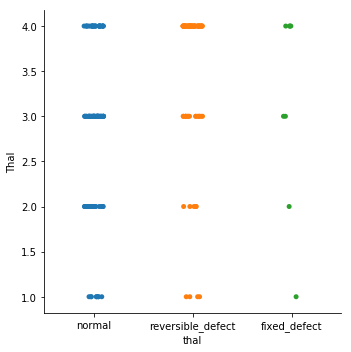

In [32]:
g = sns.catplot(x='thal', y='chest_pain_type' ,data=X_train)
# g.despine(left=True)
g.set_ylabels("Thal")

# NaN values

In [44]:
X_train.isna().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

# GroupBys & Counts

In [57]:
X_train.shape

(180, 14)

In [63]:
gb = X_train.groupby(['oldpeak_eq_st_depression', 'max_heart_rate_achieved'])
counts = gb.size().to_frame(name='counts')
X_train_counts = counts\
.join(gb.agg('mean'))\
.reset_index()

In [76]:
X_train['count1'] = X_train.groupby(['oldpeak_eq_st_depression', 'max_heart_rate_achieved'])['oldpeak_eq_st_depression'].transform('count')

In [77]:
X_train.shape

(180, 15)

In [3]:
X_train.head(20)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
5,ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0
6,2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0
7,daa9kp,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1
8,3nwy2n,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1
9,1r508r,2,normal,120,3,0,0,0,219,1.6,0,50,158,0


In [79]:
X_train['resting_blood_pressure'].value_counts()

130    26
140    22
120    21
110    11
150    10
160     9
112     8
128     8
125     7
108     5
124     5
135     4
118     4
145     4
132     3
180     3
138     3
134     2
178     2
126     2
142     2
100     2
152     2
136     2
115     2
172     1
102     1
105     1
106     1
117     1
170     1
156     1
155     1
122     1
144     1
94      1
Name: resting_blood_pressure, dtype: int64

In [4]:
X_test = pd.read_csv('../data/test_values.csv')

In [5]:
X_test.head(10)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1
5,kev1sk,2,normal,122,3,0,0,0,213,0.2,0,43,165,0
6,9n6let,3,normal,150,1,0,0,0,226,2.6,0,66,114,0
7,jxmtyg,2,reversible_defect,140,3,3,0,2,254,2.0,1,69,146,0
8,51s2ff,1,normal,138,4,0,0,2,271,0.0,1,59,182,0
9,wi9mcs,1,normal,138,3,0,0,2,257,0.0,1,47,156,0


In [13]:
cols = [x for x in X_test.columns if x != 'patient_id']
print('Values in test:\n')
for c in cols:
    print(c, '- distinct values:',len(X_test[c].value_counts()))
print('\n\n')
print('Values in train:\n')
for c in cols:
    print(c, '- distinct values:',len(X_train[c].value_counts()))

Values in test:

slope_of_peak_exercise_st_segment - distinct values: 3
thal - distinct values: 3
resting_blood_pressure - distinct values: 38
chest_pain_type - distinct values: 4
num_major_vessels - distinct values: 4
fasting_blood_sugar_gt_120_mg_per_dl - distinct values: 2
resting_ekg_results - distinct values: 3
serum_cholesterol_mg_per_dl - distinct values: 72
oldpeak_eq_st_depression - distinct values: 28
sex - distinct values: 2
age - distinct values: 32
max_heart_rate_achieved - distinct values: 57
exercise_induced_angina - distinct values: 2



Values in train:

slope_of_peak_exercise_st_segment - distinct values: 3
thal - distinct values: 3
resting_blood_pressure - distinct values: 36
chest_pain_type - distinct values: 4
num_major_vessels - distinct values: 4
fasting_blood_sugar_gt_120_mg_per_dl - distinct values: 2
resting_ekg_results - distinct values: 3
serum_cholesterol_mg_per_dl - distinct values: 118
oldpeak_eq_st_depression - distinct values: 34
sex - distinct values: 

In [7]:
X_test['slope_of_peak_exercise_st_segment'].unique()

array([2, 1, 3])